<a href="https://colab.research.google.com/github/tad-kim/group_1/blob/main/tad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
    # css 파일 읽기
df = pd.read_csv("IMDB top 1000.csv", encoding='utf-8')
    # numpy 로 변환
data = df.to_numpy()

title = data[:,1]
    # css 파일 읽기
df = pd.read_csv("IMDB top 1000.csv", encoding='utf-8')
    # numpy 로 변환
data = df.to_numpy()

    #title_genre_rate 컬럼 + title 년도 제거
title_genre_rate = data[:, [1, 4, 5]]
cleaned_titles = np.array([re.sub(r'\s*\(\d{4}\)', '', title) for title in title])
title_genre_rate[:, 0] = cleaned_titles
title_genre_rate[:, 0] = np.array([re.sub(r'^\d+\.\s*', '', t) for t in title_genre_rate[:, 0]])

    #released years 컬럼
released_years = np.array([title[-5:-1] for title in title])

# Step2
    # ③ 최종 데이터 결합
final_data = np.column_stack((title_genre_rate, released_years))

print("전체 영화 개수: ", final_data.shape[0])
print("평점 평균: ", np.mean(final_data[:, 2].astype(float)))
print("최고 평점: ", np.max(final_data[:, 2].astype(float)))
print("최저 평점: ", np.min(final_data[:, 2].astype(float)))

# Step3
for i in range(final_data.shape[0]):
    if final_data[i, 2] == np.max(final_data[:, 2].astype(float)):
        print("최고 평점 영화 제목:\n", final_data[i, 0], "- 평점 :", final_data[i, 2])

# step4
genre_1 = {}
for i in title_genre_rate:
    gen = i[1].split(',')
    for j in gen:
        j = j.strip()
        genre_1.setdefault(j, []).append(float(i[2]))

genre_rateavg = {}
genre_rate = []
    # 장르만 추출
genre = list(genre_1.keys())
    # 평점만 추출
for i in genre:
    genre_1[i] = np.mean(genre_1[i])
    genre_rate.append(round(float(genre_1[i]),2))
    # 장르와 평점으로 딕셔너리 생성
for i in range(len(genre)):
    genre_rateavg[genre[i]] = genre_rate[i]
    # 평점 오름차순 정렬
def get_value(item):
    return item[1]
sorted_genre_rate = dict(sorted(genre_rateavg.items(), key = get_value, reverse = True))
for i in sorted_genre_rate:
    print(i, sorted_genre_rate[i])

# Step5
years1 = {}
for i in range (len(released_years)):
    years1.setdefault(int(released_years[i]), []).append(final_data[i, 2])
print(years1)
years_rateavg = {}
years_rate = []
    # 연도만 추출
years = list(years1.keys())
    # 평점만 추출해서 평균 계산산
for i in years:
    years1[i] = np.mean(years1[i])
    years_rate.append(round(float(years1[i]), 2))
    # 연도와 평균 평점으로 딕셔너리 생성성
for i in range(len(years)):
    years_rateavg[years[i]] = years_rate[i]
    # 연도 오름차순 정렬
def get_keys(item):
    return item[0]
sorted_years_rate = dict(sorted(years_rateavg.items(), key = get_keys, reverse = False))
    # 연도와 평균 평점 한 줄씩 출력
for i in sorted_years_rate:
    print(i, sorted_years_rate[i])
x = list(sorted_years_rate.keys())
y = list(sorted_years_rate.values())
plt.title("rate by years")
plt.xlabel("year")
plt.ylabel("rate")
plt.plot(x, y)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



FileNotFoundError: [Errno 2] No such file or directory: 'IMDB top 1000.csv'

평점 8.0 이상 & 2000년 이후 제작된 영화 개수:  573
평점 8.0 이상 & 2000년 이후 제작 영화:
제작년도:2020, 제목:Hamilton,평점:8.7
제작년도:2019, 제목:Parasite,평점:8.6
제작년도:2019, 제목:Marriage Story,평점:8.0
제작년도:2019, 제목:1917,평점:8.3
제작년도:2019, 제목:Avengers: Endgame,평점:8.4


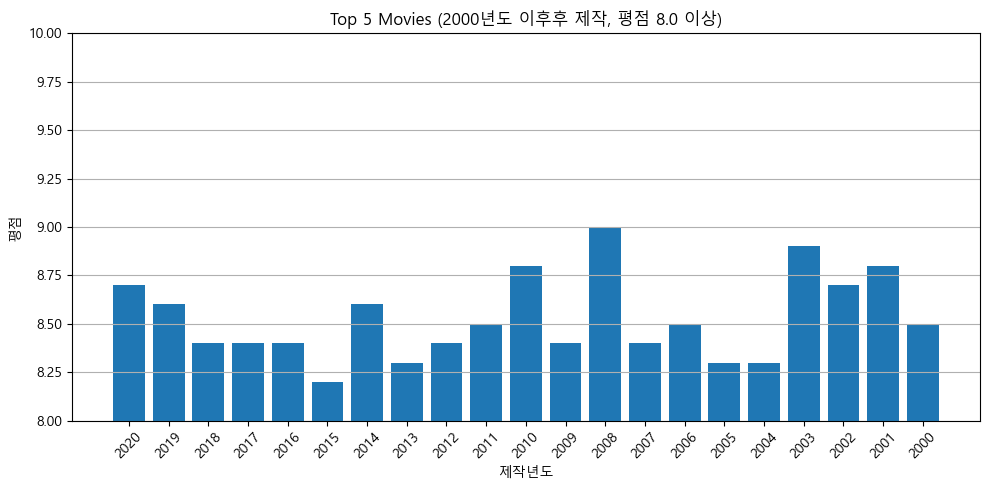

In [ ]:
# Step6
# 특정조건 (예 평점 8.0 이상 & 2000년대 이후 제작) 충족 하는 영화만 필터링
movie_df = []
for i in final_data:
    if float(i[2]) >= 8.0 and int(i[3]) >= 2000:
        movie_df.append(i)
final_movie = np.array(movie_df)
print("평점 8.0 이상 & 2000년 이후 제작된 영화 개수: ", final_movie.shape[0])
print(f"평점 8.0 이상 & 2000년 이후 제작 영화:")
movie_years = final_movie[:, 3].astype(int)
year_idx = np.argsort(movie_years)[::-1]  # 내림차순 정렬
final_movie = final_movie[year_idx]
# 제작년도, 제목, 평점 출력
for movie in final_movie[:5]:  # 상위 5개 영화 출력
    movie_list = list(movie)
    print(f"제작년도:{movie_list[3]}, 제목:{movie_list[0]},평점:{movie_list[2]}")

# 그래프 그리기
plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
plt.rcParams['figure.figsize'] = (10, 5)  # 그래프 크기 설정
plt.ylim(8.0, 10.0) # y축 범위 설정
plt.title("Top 5 Movies (2000년도 이후후 제작, 평점 8.0 이상)")
plt.xlabel("제작년도")
plt.ylabel("평점")
plt.bar(final_movie[:, 3], final_movie[:, 2])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# Setp7
# 특정 감독별 평균 평점 확인
